# Central Limit Theorem

**Further Reading**: §4.11 in Navidi (2015)

## Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Define statistical inference to a freshman engineer. Give two science or engineering examples.
* Explain the central limit theorem.
* Use the central limit theorem to calculate probabilities involving the sample mean. Do this with and without standardizing. (Two approaches, same answer.)

In [11]:
# load libraries
import scipy.stats as stats
from scipy.stats import norm
import scipy as sp
import numpy as np
import math
import matplotlib.pyplot as plt
import random

## Introduction

The **Central Limit Theorem** (CLT) is the mathematical foundation for almost all of the statistical inference tools we will study this semester.

Let $X_1$, ..., $X_n$ represent a simple random sample from the **population** with mean $\mu$ and variance $\sigma^2$.

**Key Insight**: We will use probability to model generating a sample. Each datum is a realization of the random variable $X$.

Likewise, the **sample mean** is a random variable:

$$
\bar{X} = \frac{X_1 + ... + X_n}{n}
$$

The **CLT** says that **sample mean** converges to the **normal (Gaussian) distribution** with mean $\mu$ and variance $\frac{\sigma^2}{n}$ as $n \rightarrow \infty$:

$$
\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n}) \qquad \mathrm{approximately}
$$

**Key Insights**:
1. The CLT holds irregardless of the probability distribution ($\sigma^2 \leq \infty$) of the population (i.e., individual samples).
2. $\sigma^2$ is the variance of the population distribution.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Answer the following conceptual questions with a partner.
</div>

**Conceptual Questions:**
1. Explain the difference between the **population distribution** and **sample mean distribution**.
2. What happens to the variance of $\bar{X}$ when $n$ increases. Why does this make sense?

## Numerical Illustrations of Central Limit Theorem

A common "right of passage" in a rigorous statistics course is to mathematically prove the [central limit theorem holds](https://www.stat.berkeley.edu/~mlugo/stat134-f11/clt-proof.pdf). Instead, we will use simulation with a random number generator to demonstrate the CLT holds.

### Samples from Uniform Distribution

Let's first consider the case where the samples are drawn from a uniform distribution defined over [0, 1].

In [12]:
def uniform_population(n,LOUD=True):
    ''' Simulate samples of size n from standard uniform distribution
    
    Arguments:
        n - number of datum in each sample
        
    Returns:
        None

    '''

    # number of times to repeat sampling procedure
    Nsim = 1000

    # preallocate vector to store results
    sample_means = np.zeros(Nsim)

    # simulate sampling Nsim number of times
    for i in range(0,Nsim):

        # generate n samples from uniform distribution
        for j in range(0,n):
            sample_means[i] += random.random()

        sample_means[i] *= 1/n

    plt.hist(sample_means,density=True,label="Simulation Results")
    plt.title('Sampling Distribution for n = {}'.format(n))
    
    xbar = np.mean(sample_means)
    var = np.var(sample_means)
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(sample_means)
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2,color="red",label="Fitted Normal PDF")
    
    plt.legend()
    
    plt.show()
    
    if LOUD:
        print("Calculated average of sample means:\t",xbar)
        print("\nCalculated variance of sample means:\t",var)
        
        # variance of [0, 1] uniform distribition
        var_uniform = 1/12
        
        # predict variance based on sample CLT
        print("Predicted sample distribution variance:\t",var_uniform/n)
    
        # fitted variance
        print("Fitted sample distribution variance:\t",std**2)
    
    return None

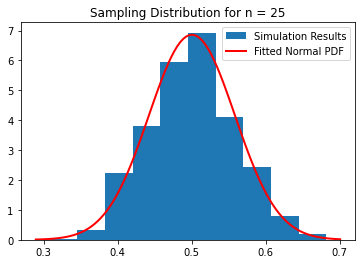

Calculated average of sample means:	 0.5002613481038136

Calculated variance of sample means:	 0.003380401655593317
Predicted sample distribution variance:	 0.003333333333333333
Fitted sample distribution variance:	 0.0033804016555933165


In [13]:
uniform_population(25)

**Activity**. With a partner, answer the following questions.
1. What happens when $n = 1$? Explain why the histogram looks the way it does.
2. For this example, how large does $n$ need to be for the CLT approximation to be reasonable?

### Samples from Bimodal Distribution

Now let's consider the example where $X$ is drawn from a bimodal distribution. For example, we want to draw

$$
X \sim \mathcal{N}(3,1)
$$

75% of the time and the other 25% of the time draw the samples as follows:

$$
X \sim \mathcal{N}(-1,0.5)
$$

In the code below, we use ``random.gauss`` https://docs.python.org/3.4/library/random.html#random.gauss

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Explain the code below to your neighbor.
</div>


In [14]:
def bimodal_population(n,LOUD=True):
    ''' Simulate samples of size n from standard uniform distribution
    
    Arguments:
        n - number of datum in each sample
        
    Returns:
        None

    '''

    # number of times to repeat sampling procedure
    Nsim = 1000

    # preallocate vector to store results
    sample_means = np.zeros(Nsim)

    # simulate sampling Nsim number of times
    for i in range(0,Nsim):

        # generate n samples from bimodal distribution
        for j in range(0,n):
            
            if random.random() < 0.75:
                sample_means[i] += random.gauss(3,1)
                
            else:
                sample_means[i] += random.gauss(-1,math.sqrt(0.5))

        sample_means[i] *= 1/n

    plt.hist(sample_means,density=True,label="Simulation Results")
    plt.title('Sampling Distribution for n = {}'.format(n))
    
    xbar = np.mean(sample_means)
    var = np.var(sample_means)
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(sample_means)
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2,color="red",label="Fitted Normal PDF")
    
    plt.legend()
    
    plt.show()
    
    if LOUD:
        print("Calculated average of sample means:\t",xbar)
        print("Calculated variance of sample means:\t",var)
        print("Calculated median of sample means:\t",np.median(sample_means))
    
    return None

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss the following questions with a partner:
</div>

1. What does the histogram look like with $n=1$? Why does this make sense? Why are the mean and median different?
2. For this example, how large does $n$ need to be for the CLT approximation to be reasonable?

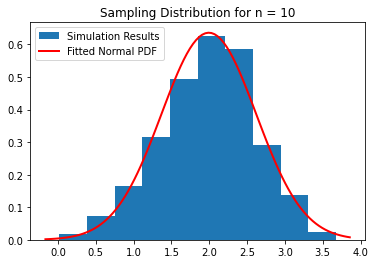

Calculated average of sample means:	 1.993786799173391
Calculated variance of sample means:	 0.39324914272495753
Calculated median of sample means:	 2.026671522523991


In [15]:
bimodal_population(10)

## Illustrative Example: Membrane Defects

Let $X$ denote the number of defects in 1 cm$^2$ patch of membrane. The probability density function of $X$ is given in the following dictionary:

In [16]:
pmf = {0:0.60, 1:0.22, 2:0.13, 3:0.04, 4:0.01}

total = 0
for i in pmf.keys():
    print("Probability of {} defects is {}".format(i,pmf[i]))
    total += pmf[i]
print("\nSanity check. Probabilities sum to",total)

Probability of 0 defects is 0.6
Probability of 1 defects is 0.22
Probability of 2 defects is 0.13
Probability of 3 defects is 0.04
Probability of 4 defects is 0.01

Sanity check. Probabilities sum to 1.0


For simplicity, we will assume $P(X \geq 5) = 0$.

We sample one 1 cm$^2$ patch of membranes from this population.

*What is the probability the average number of defects per patch will be 0.5 or smaller for this sample?*

### Expected Value of Defects

We can compute the expected number of defects using a formula from last week.

In [17]:
# expected number of defects
ev = 0

# loop over outcomes
for i in pmf.keys():
    ev += pmf[i]*i
print(ev)

0.64


### Variance of Defects


In [18]:
# compute expected value of x^2
evx2 = 0
for i in pmf.keys():
    evx2 += pmf[i]*i*i

# compute variance
var = evx2 - ev**2
print(var)

0.8504


### Standard Deviation of Number of Defects

In [19]:
print(math.sqrt(var))

0.9221713506718803


### Probability

Recall the CLT tells of the mean (average) number of defects per patch is normally distributed:

$$
\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n}) \qquad \mathrm{approximately}
$$

You calculated $\mu$ and $\sigma^2$ already. Now we just need to calculate:

$$P(\bar{X} \leq 0.5)$$

We can do this using the cumulative distribution function for $\mathcal{N}(\mu, \frac{\sigma^2}{n})$.


In [20]:
sp.stats.norm(ev, math.sqrt(var)).cdf(0.5)

0.4396661875447759

**Python Trick:** Most textbooks write the normal distribution as $\mathcal{N}(\mu,\sigma^2)$ where the second argument is **variance**. The collection of function available ``scipy.stats.norm`` specify **standard deviation** as the second argument. These opposing conventions are unfortunate, but all too common. When in doubt, always check the [documentation.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)